In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re 
import emoji
import demoji
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import csv
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from PIL import Image


%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solozobovavaleria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print('The nltk version is {}.'.format(nltk.__version__))
print('The emoji  version is {}.'.format(emoji.__version__))
print('The demoji  version is {}.'.format(demoji.__version__))
print('The re  version is {}.'.format(re.__version__))
print ('The version of Image {}.'.format(Image.__version__))

The nltk version is 3.8.1.
The emoji  version is 1.4.1.
The demoji  version is 1.1.0.
The re  version is 2.2.1.
The version of Image 9.4.0.


In [3]:
df=pd.read_csv('supply_chain_cleaned_Valeria_05_06.csv')
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   

   Stars                                               Text  Review Votes  \
0      5  I feel so LUCKY to have found this used (phone...           1.0   
1      4  nice phone, nice up grade from my pantach revu...           0.0   
2      5                                       Very pleased           0.0   
3      4  It works good but it goes slow sometimes but i...           0.0   
4      4  Great phone to replace my lost phone. The only...           0.0   

   AverageRating  ReviewsNumber Sentiment  
0       3.702703             37  Positive  
1       3.702703             37  Positive  
2       3.702703             37  Positive  
3       3.702703             37  Positive  
4       3.702703             37  Positive

In [4]:
df.info()
#AverageRating is object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326799 entries, 0 to 326798
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Product Name   326799 non-null  object 
 1   Brand Name     326799 non-null  object 
 2   Price          321825 non-null  float64
 3   Stars          326799 non-null  int64  
 4   Text           326799 non-null  object 
 5   Review Votes   326799 non-null  float64
 6   AverageRating  326799 non-null  float64
 7   ReviewsNumber  326799 non-null  int64  
 8   Sentiment      326799 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 22.4+ MB


In [5]:
df['Review length'] = [len(_) for _ in df.Text]

# Get the number of tokens per review 
df['Word count'] = [len(_.split()) for _ in df.Text]

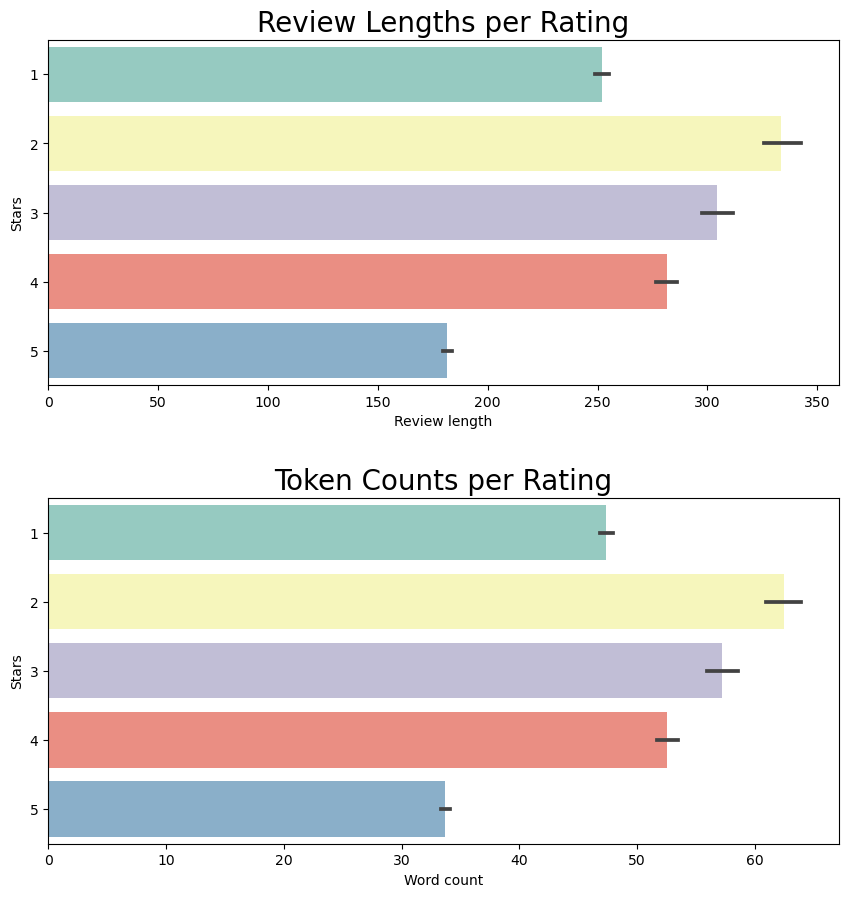

In [6]:
#length of review and rating
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Plot Range of Review Lengths per Rating
ax1.set_title('Review Lengths per Rating', fontsize=20)
sns.barplot(data=df, x='Review length', y='Stars',
            orient="h",palette='Set3',
            ax=ax1)

# Plot Range of Token Counts per Rating
ax2.set_title('Token Counts per Rating', fontsize=20)
sns.barplot(data=df, x='Word count', y='Stars',
            orient="h",palette='Set3',
            ax=ax2);

In [7]:
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   

   Stars                                               Text  Review Votes  \
0      5  I feel so LUCKY to have found this used (phone...           1.0   
1      4  nice phone, nice up grade from my pantach revu...           0.0   
2      5                                       Very pleased           0.0   
3      4  It works good but it goes slow sometimes but i...           0.0   
4      4  Great phone to replace my lost phone. The only...           0.0   

   AverageRating  ReviewsNumber Sentiment  Review length  Word count  
0       3.702703             37  Positive            374          72  
1       3.702703             37  Positive            214          40  
2       3.702703             37  Positive             12           2  
3       3.702703             37  Positive             76          17  
4       3.702703             37  Positive            223          43

In [8]:
#Preprocessing of text in review

#Now we will replace emoji with corresponding text: example

print(df['Text'].loc[[5808]])

5808    Amaising....thanks you...!!!!😉👌
Name: Text, dtype: object


In [9]:
def findEmoji(text):
    r = re.compile(re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])'))
    emojis = r.findall(text)
    return emojis
df['emoji'] = df.Text.apply(lambda x: findEmoji(x))
df['emoji'].value_counts()

emoji
[]                                                                                                                       324456
[(, 😊, )]                                                                                                                   171
[(, 👍, )]                                                                                                                   167
[(, 😡, )]                                                                                                                    58
[(, 😀, )]                                                                                                                    58
                                                                                                                          ...  
[(, 😱, ), (, 😱, ), (, 😱, ), (, 😱, ), (, 😱, ), (, 😱, )]                                                                        1
[(❤, , ), (, 👍, )]                                                                                

In [10]:
#We replace emoji to the words
def replace_emoji(text):
    text= ' '.join([emoji.demojize(emo) for emo in text.split()])
    return text
        
    
df['Text']=df['Text'].apply(replace_emoji)
#to test how it workb
print(df['Text'].loc[[5808]])

5808    Amaising....thanks you...!!!!:winking_face::OK...
Name: Text, dtype: object


In [11]:
def replace_exclamation(text):
    r = re.compile(r"!")
    text= re.sub(r, ' exclamation ', text)
    return  text


df['Text']=df['Text'].apply(replace_exclamation)


In [12]:
def remove_digits(text):
    text = re.sub(r"\d+", " ", text)
    return text

df.Text=df.Text.apply(remove_digits)

In [13]:
#test how it works
text= "This must not b3 delet3d, but the number at the end yes 134411"
remove_digits(text)

'This must not b  delet d, but the number at the end yes  '

In [14]:
def correct_spelling(text): 
    pattern=r"issues|issuei|isue" 
    text=re.sub(pattern,' issue',text) 
    pattern=r"sym|simm|sims" 
    text=re.sub(pattern,'sim',text) 
    pattern=r"batter|batt|batery|phonebattery|batteryary|batteryery|itbattery|thisbattery|batteryy" 
    text=re.sub(pattern,'battery',text) 
    pattern=r"dallor|bucks|dollars" 
    text=re.sub(pattern,'dollar',text) 
    pattern=r"megapixels" 
    text=re.sub(pattern,'megapixel',text) 
    pattern=r"amazoncom" 
    text=re.sub(pattern,'amazon',text) 
    pattern=r"screens" 
    text=re.sub(pattern,'screen',text) 
    pattern=r"moneyi" 
    text=re.sub(pattern,'money',text) 
    pattern=r"problems|problemi" 
    text=re.sub(pattern,'problem',text) 
    #remove special characters
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    
    
   
    return text

#Apply function on text



#Apply function on text
df['Text']=df['Text'].apply(correct_spelling)


In [15]:
#bringing to lower case
df['Text']=df['Text'].str.lower()

In [16]:
df.head(10)

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
5  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   

   Stars                                               Text  Review Votes  \
0      5  i feel so lucky to have found this used phone ...           1.0   
1      4  nice phone nice up grade from my pantach revue...           0.0   
2      5                                       very pleased           0.0   
3      4  it works good but it goes slow sometimes but i...           0.0   
4      4  great phone to replace my lost phone the only ...           0.0   
5      1  i already had a phone with problem i know it s...           1.0   
6      2  the charging port was loose i got that soldere...           0.0   
7      2  phone looks good but wouldnt stay charged had ...           0.0   
8      5  i originally was using the samsung s  galaxy f...           0.0   
9      3  its batteryy life is great its very responsive...           0.0   

   AverageRating  ReviewsNumber Sentiment  Review length  Word count emoji  
0       3.702703             37  Positive            374          72    []  
1       3.702703             37  Positive            214          40    []  
2       3.702703             37  Positive             12           2    []  
3       3.702703             37  Positive             76          17    []  
4       3.702703             37  Positive            223          43    []  
5       3.702703             37  Negative            415          80    []  
6       3.702703             37  Negative            214          42    []  
7       3.702703             37  Negative            173          30    []  
8       3.702703             37  Positive            766         142    []  
9       3.702703             37   Neutral            200          36    []

In [17]:
stop_words=set(stopwords.words('english'))
# Adding stopwords _ alternative 
#stop_words.update(["?", "!", ".", ",", ":", ";", "-", "--", "...", "", "'","they've", "they're", "they'll", "i've", "i'm", "i'll", "could", "would", "n't"])

df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()



Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   

   Stars                                               Text  Review Votes  \
0      5  feel lucky found used phone us used hard phone...           1.0   
1      4  nice phone nice grade pantach revue clean set ...           0.0   
2      5                                            pleased           0.0   
3      4     works good goes slow sometimes good phone love           0.0   
4      4  great phone replace lost phone thing volume bu...           0.0   

   AverageRating  ReviewsNumber Sentiment  Review length  Word count emoji  
0       3.702703             37  Positive            374          72    []  
1       3.702703             37  Positive            214          40    []  
2       3.702703             37  Positive             12           2    []  
3       3.702703             37  Positive             76          17    []  
4       3.702703             37  Positive            223          43    []

In [18]:
print (stop_words)

{'of', 'on', 'so', 'themselves', 'our', "isn't", 'how', 'shouldn', 'm', "that'll", 'as', 'at', 'most', 'both', 'or', 't', "aren't", "don't", 'wasn', 'more', 'have', 'my', 'than', 'the', "weren't", 're', 'during', 'until', 'can', 'them', 'all', "it's", 'hers', 'is', 'but', 'not', 'herself', 'after', 'between', 'there', 'himself', 'hasn', 'myself', "shan't", 'with', 'if', 'it', 'haven', 'are', 'who', 'needn', 'shan', 'ours', 'whom', 'up', "should've", 'won', 'his', 'has', 've', "doesn't", 'o', 'd', 'you', "she's", 'yourselves', 'when', 'yours', 'am', 'out', 'doing', 'from', 'did', 'down', "hadn't", "haven't", 'because', 'she', 'other', 'ain', 'isn', "hasn't", "you've", "couldn't", "needn't", 'now', 'through', 'that', 'mustn', 'such', 'aren', 'very', 'me', 'here', "you'd", 'where', 'be', 'no', "shouldn't", "you're", 'by', 'under', 'having', 'a', 'own', "wasn't", 'should', 'about', "didn't", 'while', 'only', 'this', 'being', 'before', 'your', 'll', 'i', 'same', 'why', 'don', 'which', 'was'

In [19]:
#update of stop words 
#here we can consider any word to be stopword
new_stop_words=('could','say','samsung', 'iphone', 'galaxy','apple', 'new', 'work','get', 'blu','lg')
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (new_stop_words)]))
df.head(3)

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    SAMSUNG  199.99   

   Stars                                               Text  Review Votes  \
0      5  feel lucky found used phone us used hard phone...           1.0   
1      4  nice phone nice grade pantach revue clean set ...           0.0   
2      5                                            pleased           0.0   

   AverageRating  ReviewsNumber Sentiment  Review length  Word count emoji  
0       3.702703             37  Positive            374          72    []  
1       3.702703             37  Positive            214          40    []  
2       3.702703             37  Positive             12           2    []

In [20]:
df['Text'].isna().sum()
#we have some NaN in review text, appeared after preprocessing

0

In [21]:
df.dropna(subset = ['Text'], inplace=True)


#and I removed them

In [22]:
#here we save the data to the file, and next time we can start
#directly work with the data from the file


#the save the file in csv
df.to_csv('supply_chain_text_prep_06_06.csv')    
    

In [23]:
# Visualization with wordclouds

In [76]:

#importing Images of a heart, thumbs, apple, samsung down for the wordcloud

from PIL import Image


mask_pos = np.array(Image.open("heart.jpg"))
mask_neg = np.array(Image.open("dislike.jpg"))
mask_apple = np.array(Image.open("apple.jpg"))
mask_samsung=np.array(Image.open("samsung.jpg"))
mask_neutral=np.array(Image.open("neutral.jpg"))

In [82]:
print(Image.__version__)



9.4.0


In [83]:
#new dataframes according to Sentiment
bad_rating=df[df['Sentiment'] =='Negative']
good_rating=df[df['Sentiment'] =='Positive']
middle_rating=df[df['Sentiment'] =='Neutral']

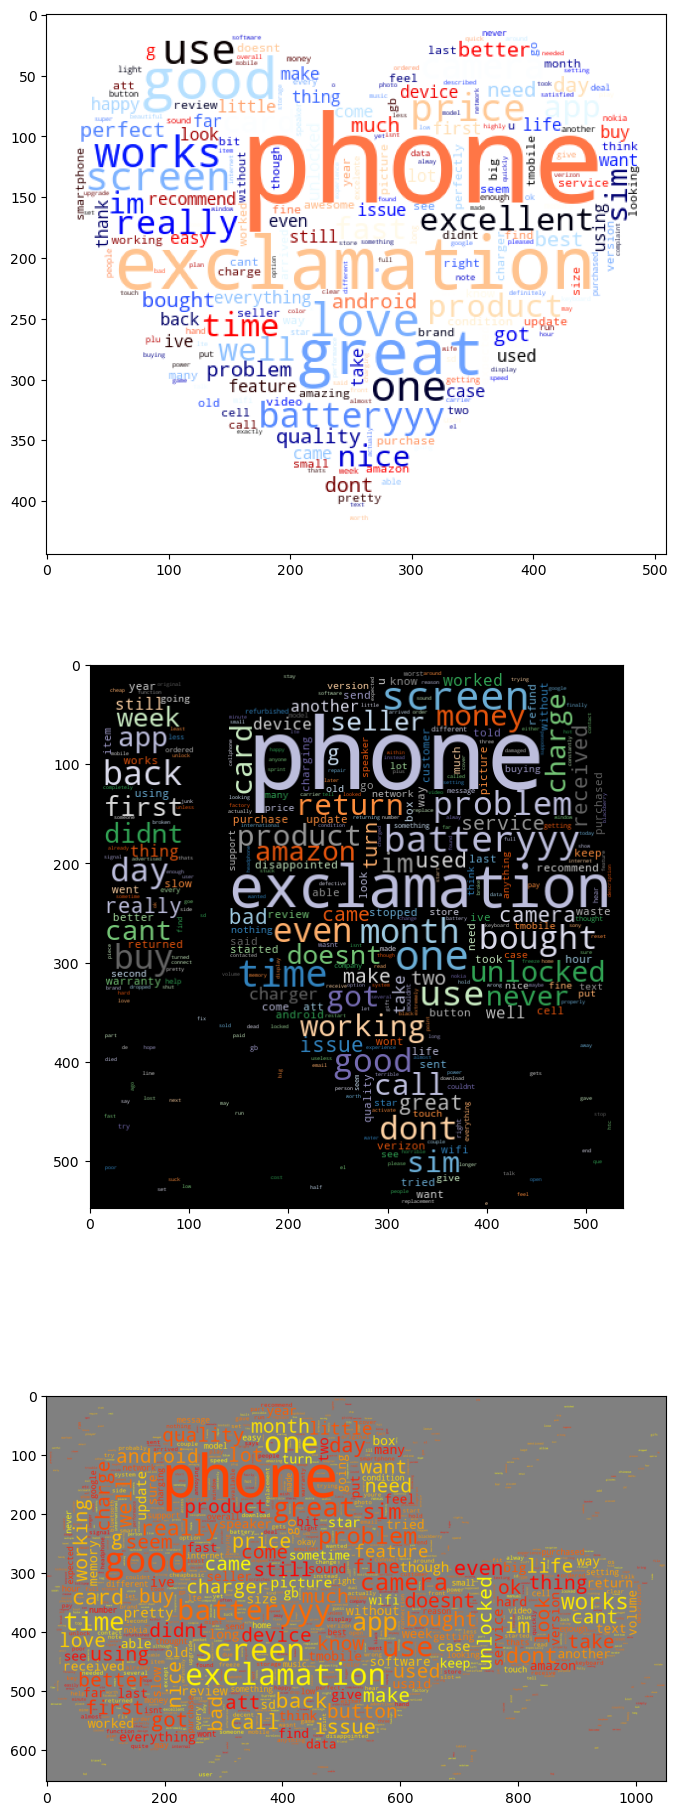

In [84]:
#Importing the necessary packages
from wordcloud import WordCloud


ig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,24))



# Joining the positive review tokens into a single string
text_pos_good = ' '.join(good_rating.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_good = WordCloud(background_color="white",
                   max_words=2000,
                   max_font_size=100,
                   colormap='flag_r',
                   collocations = False,
                   random_state =42, mask=mask_pos)

# Generate the word cloud for positive reviews
wc_pos_good.generate(text_pos_good)

# Generate and display the word cloud for positive reviews
plt.subplot(311)
plt.imshow(wc_pos_good) # Display


#plot_word_cloud(text_pos, "heart.jpg")

# Joining the positive review tokens into a single string
text_pos_bad = ' '.join(bad_rating.Text)

#Instanciating the word cloud for negative reviews template
wc_pos_bad = WordCloud(background_color="black",
                   max_words=2000,
                   colormap='tab20c',
                   max_font_size=100,
                   collocations = False,
                   random_state =42, mask=mask_neg)

# Generate the word cloud for negative reviews
wc_pos_bad.generate(text_pos_bad)

# Generate and display the word cloud for negative reviews
plt.subplot(312)
plt.imshow(wc_pos_bad) # Display

#plot_word_cloud(text_pos, "heart.jpg")

# Joining the neutral review tokens into a single string
text_pos_neutral_bi = ' '.join(middle_rating.Text)
#Instanciating the word cloud for negative reviews template
wc_pos_neutral_bi = WordCloud(background_color="grey",
                   max_words=2000,
                   colormap='autumn_r',
                   max_font_size=100,
                   collocations = False,
                   random_state =42, mask=mask_neutral)

# Generate the word cloud for neutral reviews
wc_pos_neutral_bi.generate(text_pos_neutral_bi)

# Generate and display the word cloud for neutral reviews
plt.subplot(313)
plt.imshow(wc_pos_neutral_bi); # Display


#plot_word_cloud(text_pos, "heart.jpg")


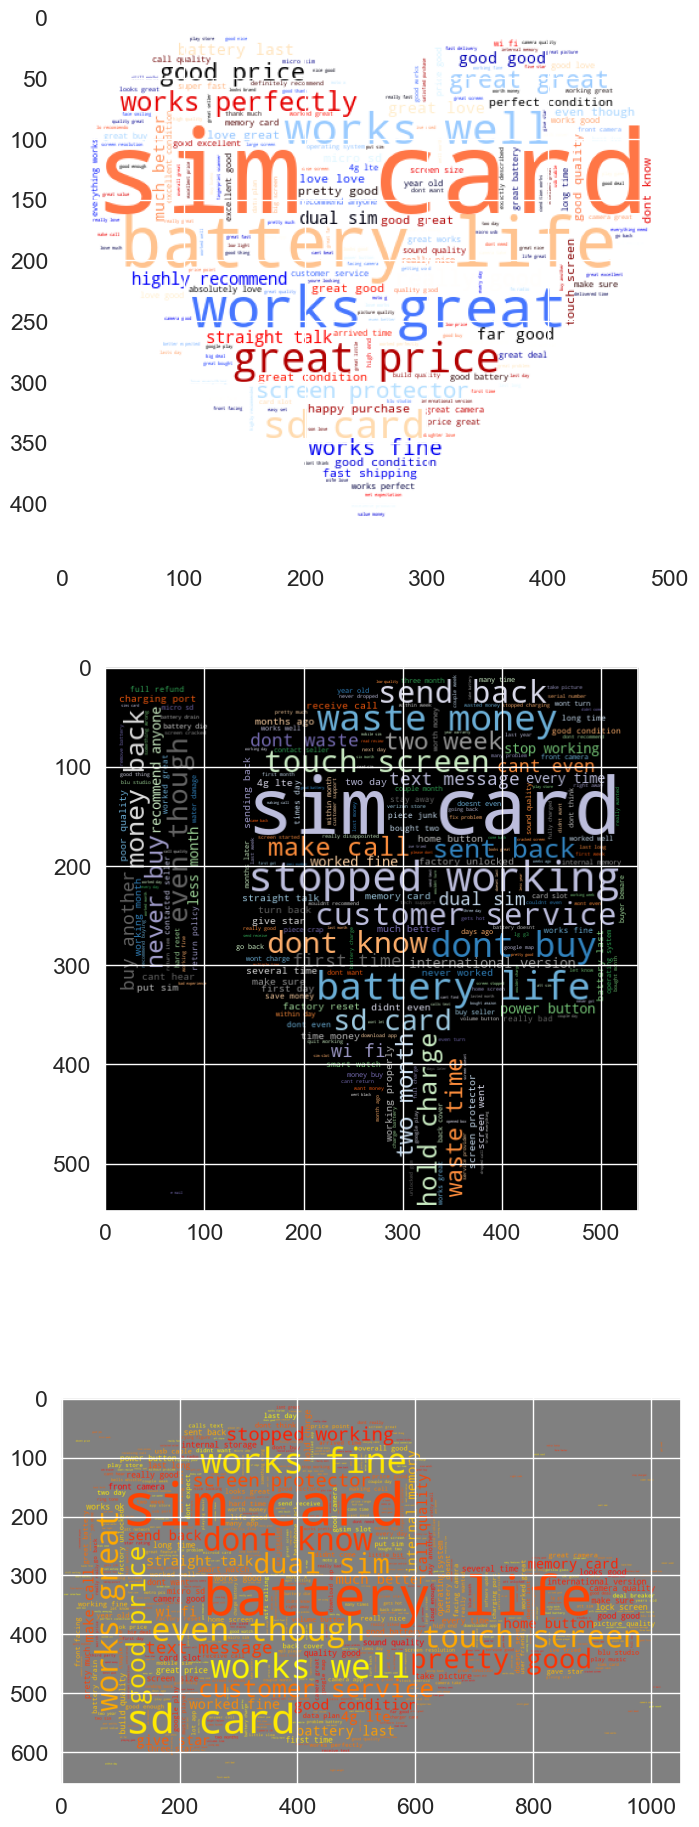

In [84]:
#the same but for bi-grams
ig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,24))

# Joining the positive review tokens into a single string
text_pos_good_bi = ' '.join(good_rating.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_good_bi= WordCloud(background_color="white",
                   max_words=2000,
                   max_font_size=100,
                   colormap='flag_r',
                   collocation_threshold = 3,   
                   random_state =42, mask=mask_pos)

# Generate the word cloud for positive reviews
wc_pos_good_bi.generate(text_pos_good_bi)

# Generate and display the word cloud for positive review
plt.subplot(311)
plt.imshow(wc_pos_good_bi) # Display


#plot_word_cloud(text_pos, "heart.jpg")

# Joining the positive review tokens into a single string
text_pos_bad_bi = ' '.join(bad_rating.Text)

#Instanciating the word cloud for negative reviews template
wc_pos_bad_bi = WordCloud(background_color="black",
                   max_words=2000,
                   colormap='tab20c',
                   max_font_size=100,
                   collocation_threshold=3,
                   random_state =42, mask=mask_neg)

# Generate the word cloud for positive reviews
wc_pos_bad_bi.generate(text_pos_bad_bi)

# Generate and display the word cloud for positive reviews
plt.subplot(312)
plt.imshow(wc_pos_bad_bi) # Display


#plot_word_cloud(text_pos, "heart.jpg")
# Joining the neutral review tokens into a single string
text_pos_neutral_bi = ' '.join(middle_rating.Text)
#Instanciating the word cloud for negative reviews template
wc_pos_neutral_bi = WordCloud(background_color="grey",
                   max_words=2000,
                   colormap='autumn_r',
                   max_font_size=100,
                   collocation_threshold=3,
                   random_state =42, mask=mask_neutral)

# Generate the word cloud for neutral reviews
wc_pos_neutral_bi.generate(text_pos_neutral_bi)

# Generate and display the word cloud for neutral reviews
plt.subplot(313)
plt.imshow(wc_pos_neutral_bi); # Display


#plot_word_cloud(text_pos, "heart.jpg")



In [86]:
#Dataframes separating samsung , apple, blu  reviews by sentiments
bad_rating_samsung=df[(df['Sentiment'] =='Negative') & (df['Brand Name']== 'SAMSUNG')]
good_rating_samsung=df[(df['Sentiment'] =='Positive')&(df['Brand Name']== 'SAMSUNG')]
middle_rating_samsung=df[(df['Sentiment'] =='Neutral')&(df['Brand Name']== 'SAMSUNG')]
 
bad_rating_apple=df[(df['Sentiment'] =='Negative') & (df['Brand Name']== 'APPLE')]
good_rating_apple=df[(df['Sentiment'] =='Positive')&(df['Brand Name']== 'APPLE')]
middle_rating_apple=df[(df['Sentiment'] =='Neutral')&(df['Brand Name']== 'APPLE')]  

bad_rating_blu=df[(df['Sentiment'] =='Negative') & (df['Brand Name']== 'BLU')]
good_rating_blu=df[(df['Sentiment'] =='Positive')&(df['Brand Name']== 'BLU')]
middle_rating_blu=df[(df['Sentiment'] =='Neutral')&(df['Brand Name']== 'BLU')]    


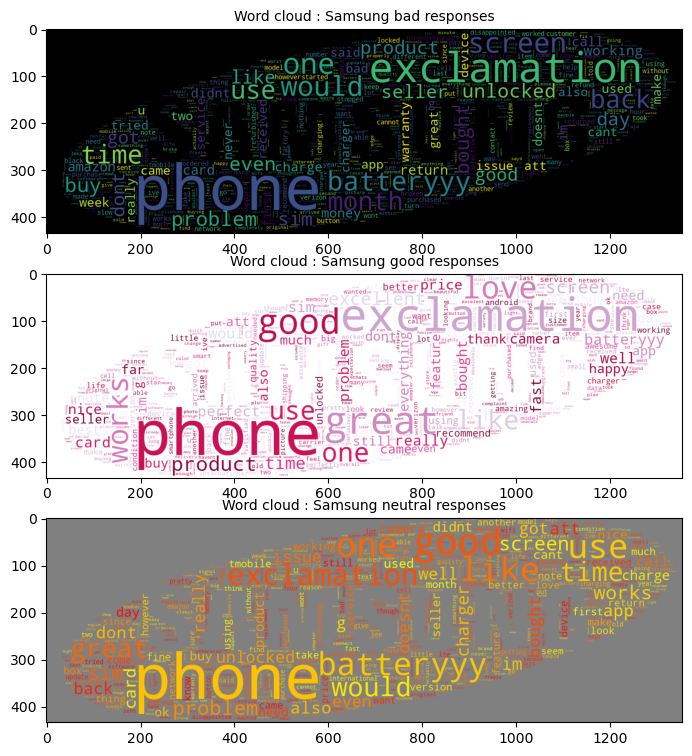

In [87]:
ig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

# Joining the positive review tokens into a single string
text_pos_samsung_bad = ' '.join(bad_rating_samsung.Text)

#Instanciating the word cloud for negative reviews template
wc_pos_samsung_bad = WordCloud(background_color="black",
                    max_words=1000,
                    stopwords=stop_words,
                    max_font_size=400,
                    collocations = False,
                    random_state =42, mask=mask_samsung)

# Generate the word cloud for negative reviews
wc_pos_samsung_bad.generate(text_pos_samsung_bad)

# Generate and display the word cloud for neigative reviews
# Initialization of a figure
plt.subplot(311)
plt.title('Word cloud : Samsung bad responses', fontsize=10)
plt.imshow(wc_pos_samsung_bad) # Display



text_pos_samsung_good = ' '.join(good_rating_samsung.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_samsung_good= WordCloud(background_color="white",
                    max_words=1000,
                    colormap='PuRd_r', 
                    stopwords=stop_words,
                    max_font_size=400,
                    collocations = False,
                    random_state =42, mask=mask_samsung)

# Generate the word cloud for positive reviews
wc_pos_samsung_good.generate(text_pos_samsung_good)

# Generate and display the word cloud for positive reviews
plt.subplot(312)
plt.title('Word cloud : Samsung good responses', fontsize=10)
plt.imshow(wc_pos_samsung_good); # Display


text_pos_samsung_neutral = ' '.join(middle_rating_samsung.Text)

#Instanciating the word cloud for neutral reviews template
wc_pos_samsung_neutral = WordCloud(background_color="grey",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='autumn_r',           
                   max_font_size=400,
                   collocations = False,
                   random_state =42, mask=mask_samsung)

# Generate the word cloud for neutral reviews
wc_pos_samsung_neutral.generate(text_pos_samsung_neutral)

# Generate and display the word cloud for neutral reviews
plt.subplot(313)
plt.title('Word cloud : Samsung neutral responses', fontsize=10)
plt.imshow(wc_pos_samsung_neutral); # Display
plt.show();



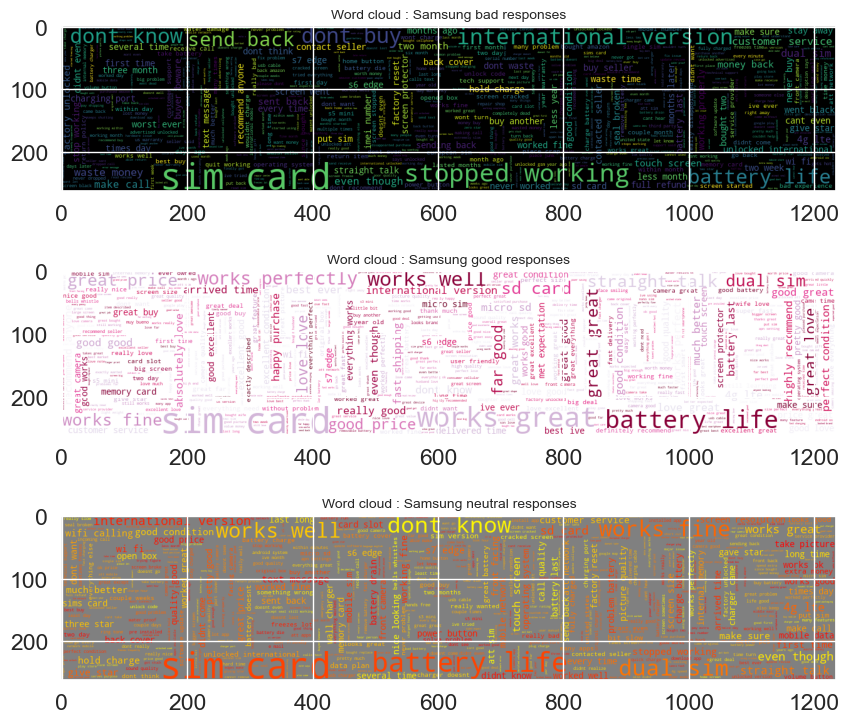

In [96]:
#Samsing bi-grams
ig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

# Joining the positive review tokens into a single string
text_pos_samsung_bad = ' '.join(bad_rating_samsung.Text)

#Instanciating the word cloud for negative reviews template
wc_pos_samsung_bad = WordCloud(background_color="black",
                    max_words=1000,
                    stopwords=stop_words,
                    max_font_size=400,
                    collocation_threshold=3,
                    random_state =42, mask=mask_samsung)

# Generate the word cloud for negative reviews
wc_pos_samsung_bad.generate(text_pos_samsung_bad)

# Generate and display the word cloud for neigative reviews
# Initialization of a figure
plt.subplot(311)
plt.title('Word cloud : Samsung bad responses', fontsize=10)
plt.imshow(wc_pos_samsung_bad) # Display



text_pos_samsung_good = ' '.join(good_rating_samsung.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_samsung_good= WordCloud(background_color="white",
                    max_words=1000,
                    colormap='PuRd_r', 
                    stopwords=stop_words,
                    max_font_size=400,
                    collocation_threshold=3,
                    random_state =42, mask=mask_samsung)

# Generate the word cloud for positive reviews
wc_pos_samsung_good.generate(text_pos_samsung_good)

# Generate and display the word cloud for positive reviews
plt.subplot(312)
plt.title('Word cloud : Samsung good responses', fontsize=10)
plt.imshow(wc_pos_samsung_good); # Display


text_pos_samsung_neutral = ' '.join(middle_rating_samsung.Text)

#Instanciating the word cloud for neutral reviews template
wc_pos_samsung_neutral = WordCloud(background_color="grey",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='autumn_r',           
                   max_font_size=400,
                   collocation_threshold=3,
                   random_state =42, mask=mask_samsung)

# Generate the word cloud for neutral reviews
wc_pos_samsung_neutral.generate(text_pos_samsung_neutral)

# Generate and display the word cloud for neutral reviews
plt.subplot(313)
plt.title('Word cloud : Samsung neutral responses', fontsize=10)
plt.imshow(wc_pos_samsung_neutral); # Display
plt.show();



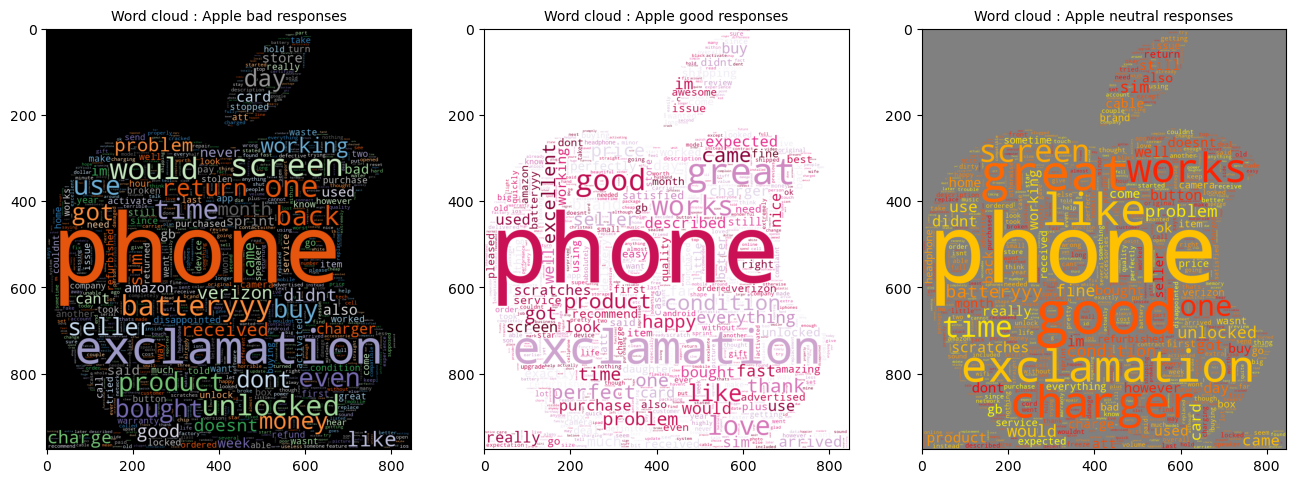

In [88]:
ig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,6))


text_pos_apple_bad = ' '.join(bad_rating_apple.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_apple_bad = WordCloud(background_color="black",
                   max_words=1000,
                   colormap='tab20c', 
                   stopwords=stop_words,
                   max_font_size=400,
                   collocations = False,
                   random_state =42, mask=mask_apple)

# Generate the word cloud for positive reviews
wc_pos_apple_bad.generate(text_pos_apple_bad)

# Generate and display the word cloud for positive reviews
plt.subplot(131)
plt.title('Word cloud : Apple bad responses', fontsize=10)
plt.imshow(wc_pos_apple_bad); # Display


text_pos_apple_good = ' '.join(good_rating_apple.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_apple_good = WordCloud(background_color="white",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='PuRd_r',           
                   max_font_size=400,
                   collocations = False,
                   random_state =42, mask=mask_apple)

# Generate the word cloud for positive reviews
wc_pos_apple_good.generate(text_pos_apple_good)

# Generate and display the word cloud for positive reviews
plt.subplot(132)
plt.title('Word cloud : Apple good responses', fontsize=10)
plt.imshow(wc_pos_apple_good); # Display


text_pos_apple_neu = ' '.join(middle_rating_apple.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_apple_neu = WordCloud(background_color="grey",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='autumn_r',          
                   max_font_size=400,
                   collocations = False,
                   random_state =42, mask=mask_apple)

# Generate the word cloud for positive reviews
wc_pos_apple_neu.generate(text_pos_apple_neu)

# Generate and display the word cloud for positive reviews
plt.subplot(133)
plt.title('Word cloud : Apple neutral responses', fontsize=10)
plt.imshow(wc_pos_apple_neu) # Display
plt.show();



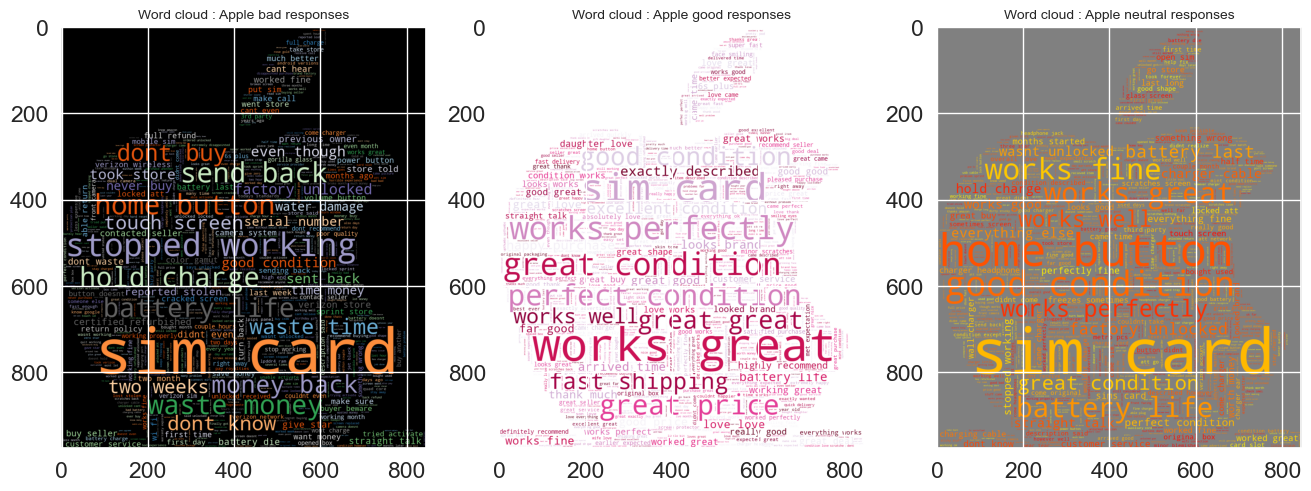

In [87]:
ig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,6))


text_pos_apple_bad = ' '.join(bad_rating_apple.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_apple_bad = WordCloud(background_color="black",
                   max_words=1000,
                   colormap='tab20c', 
                   stopwords=stop_words,
                   max_font_size=400,
                   collocation_threshold=3,
                   random_state =42, mask=mask_apple)

# Generate the word cloud for positive reviews
wc_pos_apple_bad.generate(text_pos_apple_bad)

# Generate and display the word cloud for positive reviews
plt.subplot(131)
plt.title('Word cloud : Apple bad responses', fontsize=10)
plt.imshow(wc_pos_apple_bad); # Display


text_pos_apple_good = ' '.join(good_rating_apple.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_apple_good = WordCloud(background_color="white",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='PuRd_r',           
                   max_font_size=400,
                   collocation_threshold = 3,
                   random_state =42, mask=mask_apple)

# Generate the word cloud for positive reviews
wc_pos_apple_good.generate(text_pos_apple_good)

# Generate and display the word cloud for positive reviews
plt.subplot(132)
plt.title('Word cloud : Apple good responses', fontsize=10)
plt.imshow(wc_pos_apple_good); # Display


text_pos_apple_neu = ' '.join(middle_rating_apple.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_apple_neu = WordCloud(background_color="grey",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='autumn_r',          
                   max_font_size=400,
                   collocation_threshold = 3,
                   random_state =42, mask=mask_apple)

# Generate the word cloud for positive reviews
wc_pos_apple_neu.generate(text_pos_apple_neu)

# Generate and display the word cloud for positive reviews
plt.subplot(133)
plt.title('Word cloud : Apple neutral responses', fontsize=10)
plt.imshow(wc_pos_apple_neu) # Display
plt.show();



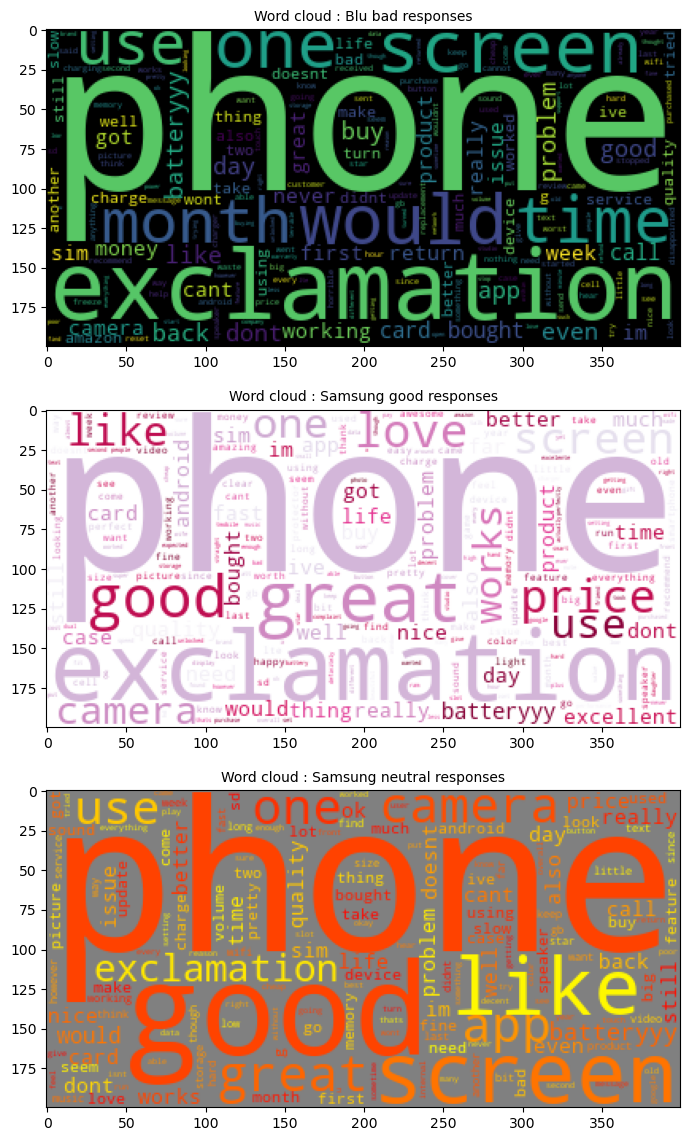

In [89]:
#Now for BLU phones
ig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,14))

# Joining the negative review tokens into a single string
text_pos_blu_bad = ' '.join(bad_rating_blu.Text)

#Instanciating the word cloud for negative reviews template
wc_pos_blu_bad = WordCloud(background_color="black",
                    max_words=1000,
                    stopwords=stop_words,
                    max_font_size=400,
                    collocations = False,
                    random_state =42)

# Generate the word cloud for negative reviews
wc_pos_blu_bad.generate(text_pos_blu_bad)

# Generate and display the word cloud for negative reviews
# Initialization of a figure
plt.subplot(311)
plt.title('Word cloud : Blu bad responses', fontsize=10)
plt.imshow(wc_pos_blu_bad) # Display



text_pos_blu_good = ' '.join(good_rating_blu.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_blu_good= WordCloud(background_color="white",
                    max_words=1000,
                    colormap='PuRd_r', 
                    stopwords=stop_words,
                    max_font_size=400,
                    collocations = False,
                    random_state =42)

# Generate the word cloud for positive reviews
wc_pos_blu_good.generate(text_pos_blu_good)

# Generate and display the word cloud for positive reviews
plt.subplot(312)
plt.title('Word cloud : Samsung good responses', fontsize=10)
plt.imshow(wc_pos_blu_good); # Display


text_pos_blu_neutral = ' '.join(middle_rating_blu.Text)

#Instanciating the word cloud for neutral reviews template
wc_pos_blu_neutral = WordCloud(background_color="grey",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='autumn_r',           
                   max_font_size=400,
                   collocations = False,
                   random_state =42)

# Generate the word cloud for neutral reviews
wc_pos_blu_neutral.generate(text_pos_blu_neutral)

# Generate and display the word cloud for neutral reviews
plt.subplot(313)
plt.title('Word cloud : Samsung neutral responses', fontsize=10)
plt.imshow(wc_pos_blu_neutral); # Display
plt.show();



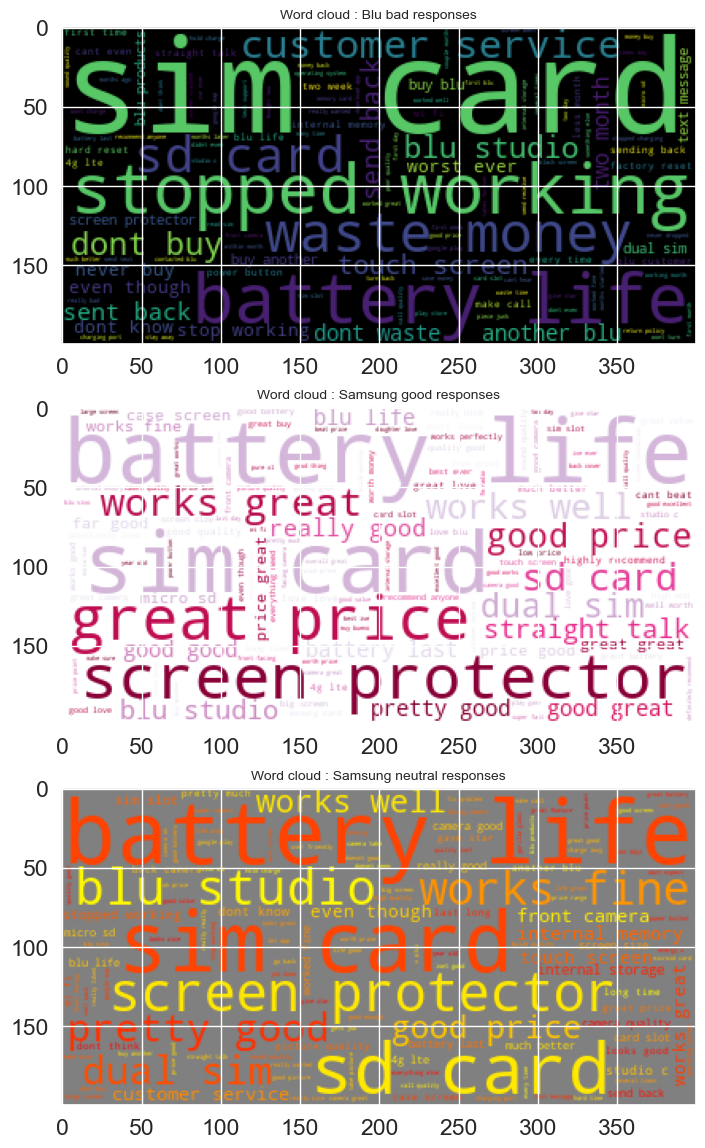

In [95]:
#Now for BLU phones - bi-grams
ig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,14))

# Joining the negative review tokens into a single string
text_pos_blu_bad = ' '.join(bad_rating_blu.Text)

#Instanciating the word cloud for negative reviews template
wc_pos_blu_bad = WordCloud(background_color="black",
                    max_words=1000,
                    stopwords=stop_words,
                    max_font_size=400,
                    collocation_threshold=3,
                    random_state =42)

# Generate the word cloud for negative reviews
wc_pos_blu_bad.generate(text_pos_blu_bad)

# Generate and display the word cloud for negative reviews
# Initialization of a figure
plt.subplot(311)
plt.title('Word cloud : Blu bad responses', fontsize=10)
plt.imshow(wc_pos_blu_bad) # Display



text_pos_blu_good = ' '.join(good_rating_blu.Text)

#Instanciating the word cloud for positive reviews template
wc_pos_blu_good= WordCloud(background_color="white",
                    max_words=1000,
                    colormap='PuRd_r', 
                    stopwords=stop_words,
                    max_font_size=400,
                    collocation_threshold=3,
                    random_state =42)

# Generate the word cloud for positive reviews
wc_pos_blu_good.generate(text_pos_blu_good)

# Generate and display the word cloud for positive reviews
plt.subplot(312)
plt.title('Word cloud : Samsung good responses', fontsize=10)
plt.imshow(wc_pos_blu_good); # Display


text_pos_blu_neutral = ' '.join(middle_rating_blu.Text)

#Instanciating the word cloud for neutral reviews template
wc_pos_blu_neutral = WordCloud(background_color="grey",
                   max_words=1000,
                   stopwords=stop_words,
                   colormap='autumn_r',           
                   max_font_size=400,
                   collocation_threshold=3,
                   random_state =42)

# Generate the word cloud for neutral reviews
wc_pos_blu_neutral.generate(text_pos_blu_neutral)

# Generate and display the word cloud for neutral reviews
plt.subplot(313)
plt.title('Word cloud : Samsung neutral responses', fontsize=10)
plt.imshow(wc_pos_blu_neutral); # Display
plt.show();

